In [10]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

In [11]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

KeyboardInterrupt: 

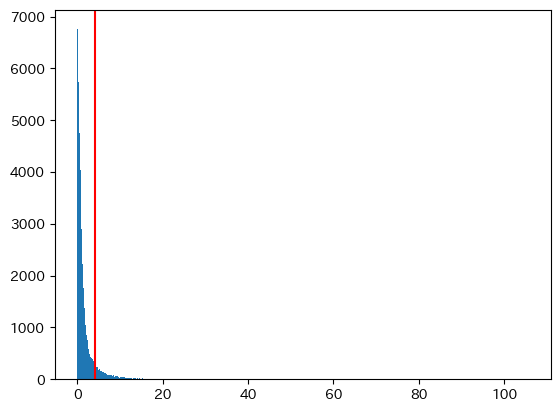

4.200000000000001

In [ ]:
# 差があるなしの基準値を求める。
gap_array =np.abs(df_king['gap_price[intra-spot](円/kWh)'].dropna().values)
plt.hist(gap_array,bins=1000)
plt.axvline(x=4.2,color = 'r')
plt.show()

np.percentile(gap_array,90)

# 4.2円/kWhとする


In [ ]:
# 価格差をあるなしに変換
df_king['絶対値gap_price[intra-spot](円/kWh)'] = np.abs(df_king['gap_price[intra-spot](円/kWh)'])
df_king['gap_judge'] ='ない'
df_king.loc[df_king['絶対値gap_price[intra-spot](円/kWh)']>=4.2,['gap_judge']] ='ある'

In [ ]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)

In [ ]:
df_select = df_king[['gap_judge','太陽光絶対値誤差合算(実績-想定)(kWh)','風力絶対値誤差合算(実績-想定)(kWh)','停止・低下ユニット数合計','spot_volume(kWh)','intra_volume（MWh/h）']].dropna()

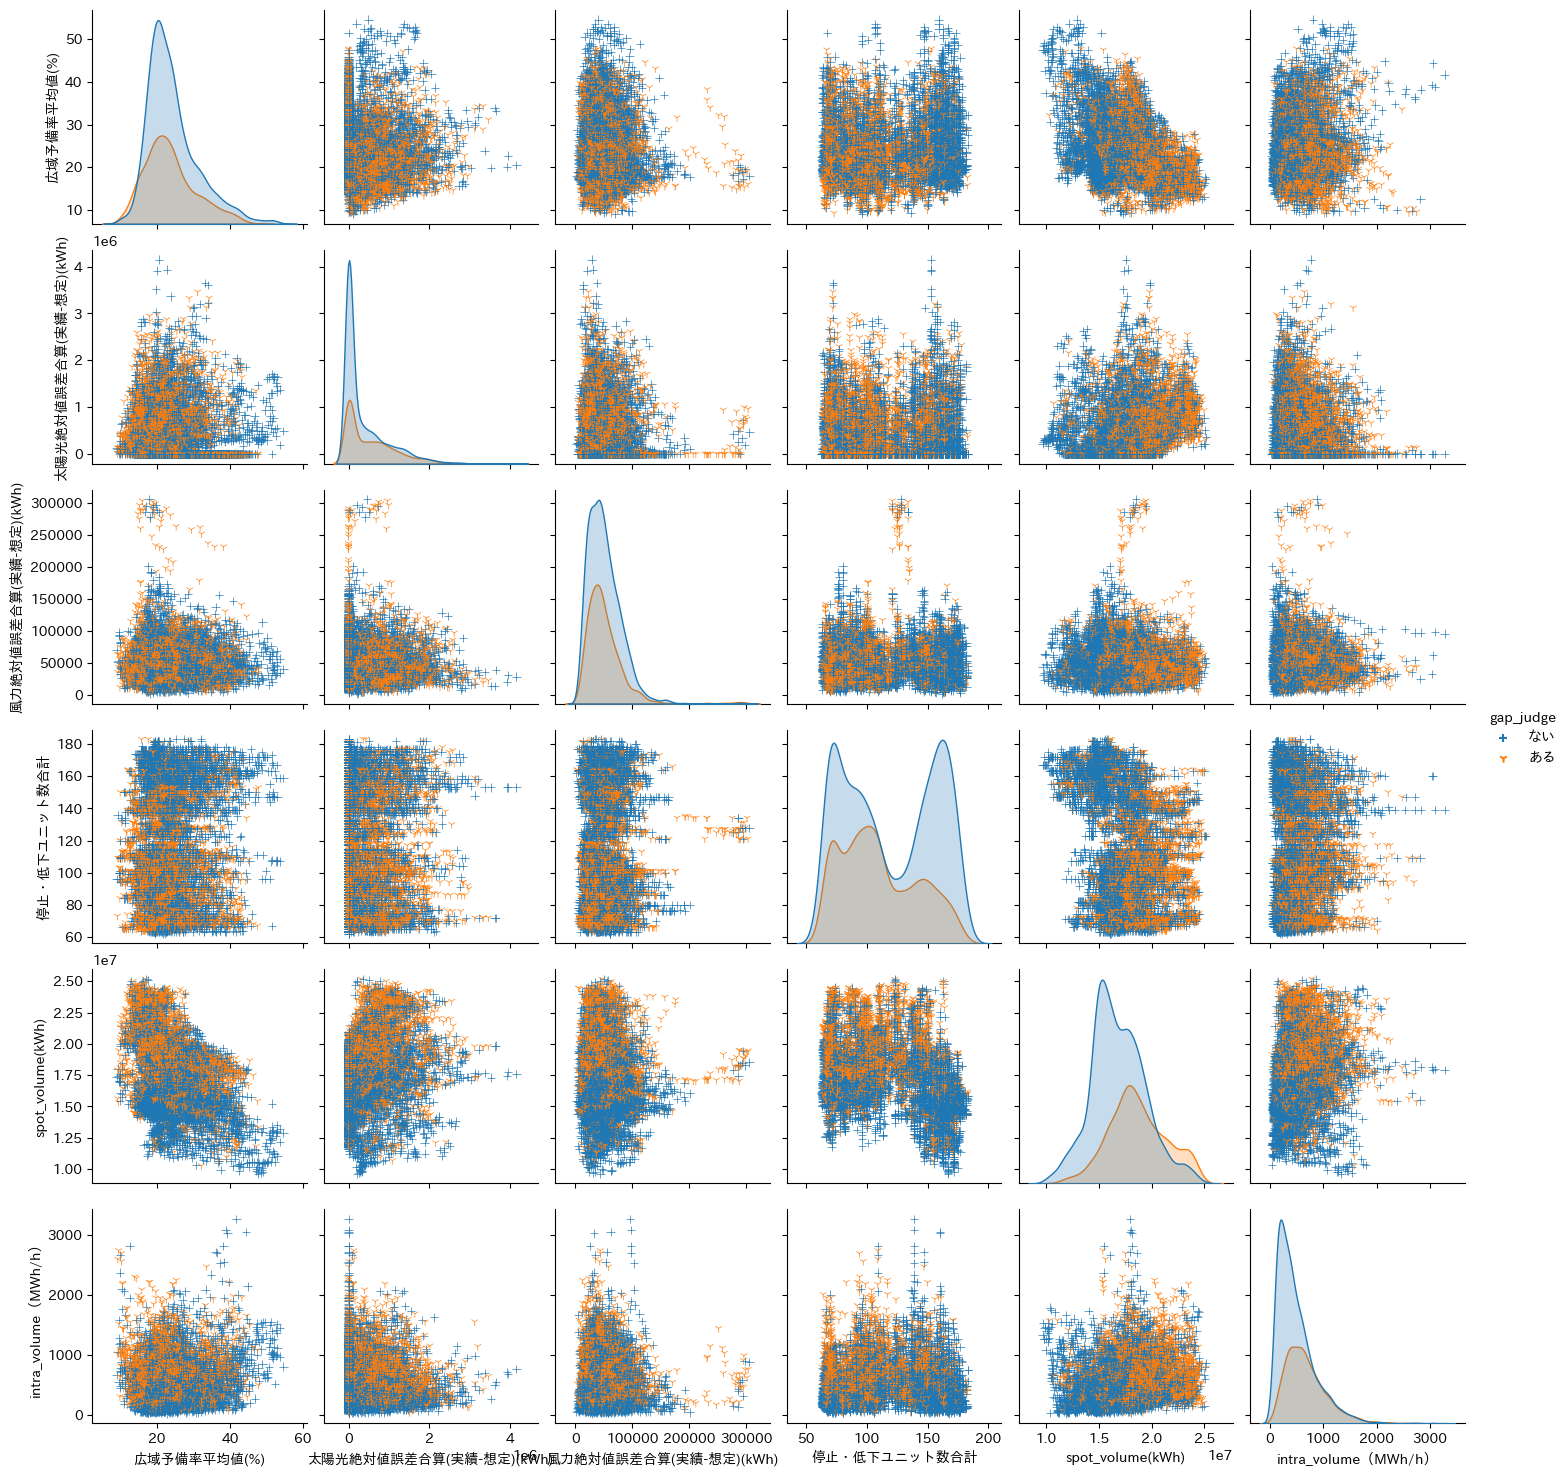

In [70]:
# 広域予備率あり
df_select = df_king[['gap_judge','広域予備率平均値(%)','太陽光絶対値誤差合算(実績-想定)(kWh)','風力絶対値誤差合算(実績-想定)(kWh)','停止・低下ユニット数合計','spot_volume(kWh)','intra_volume（MWh/h）']].dropna()
sns.pairplot(df_select, hue='gap_judge',markers=['+','1'])
plt.show()

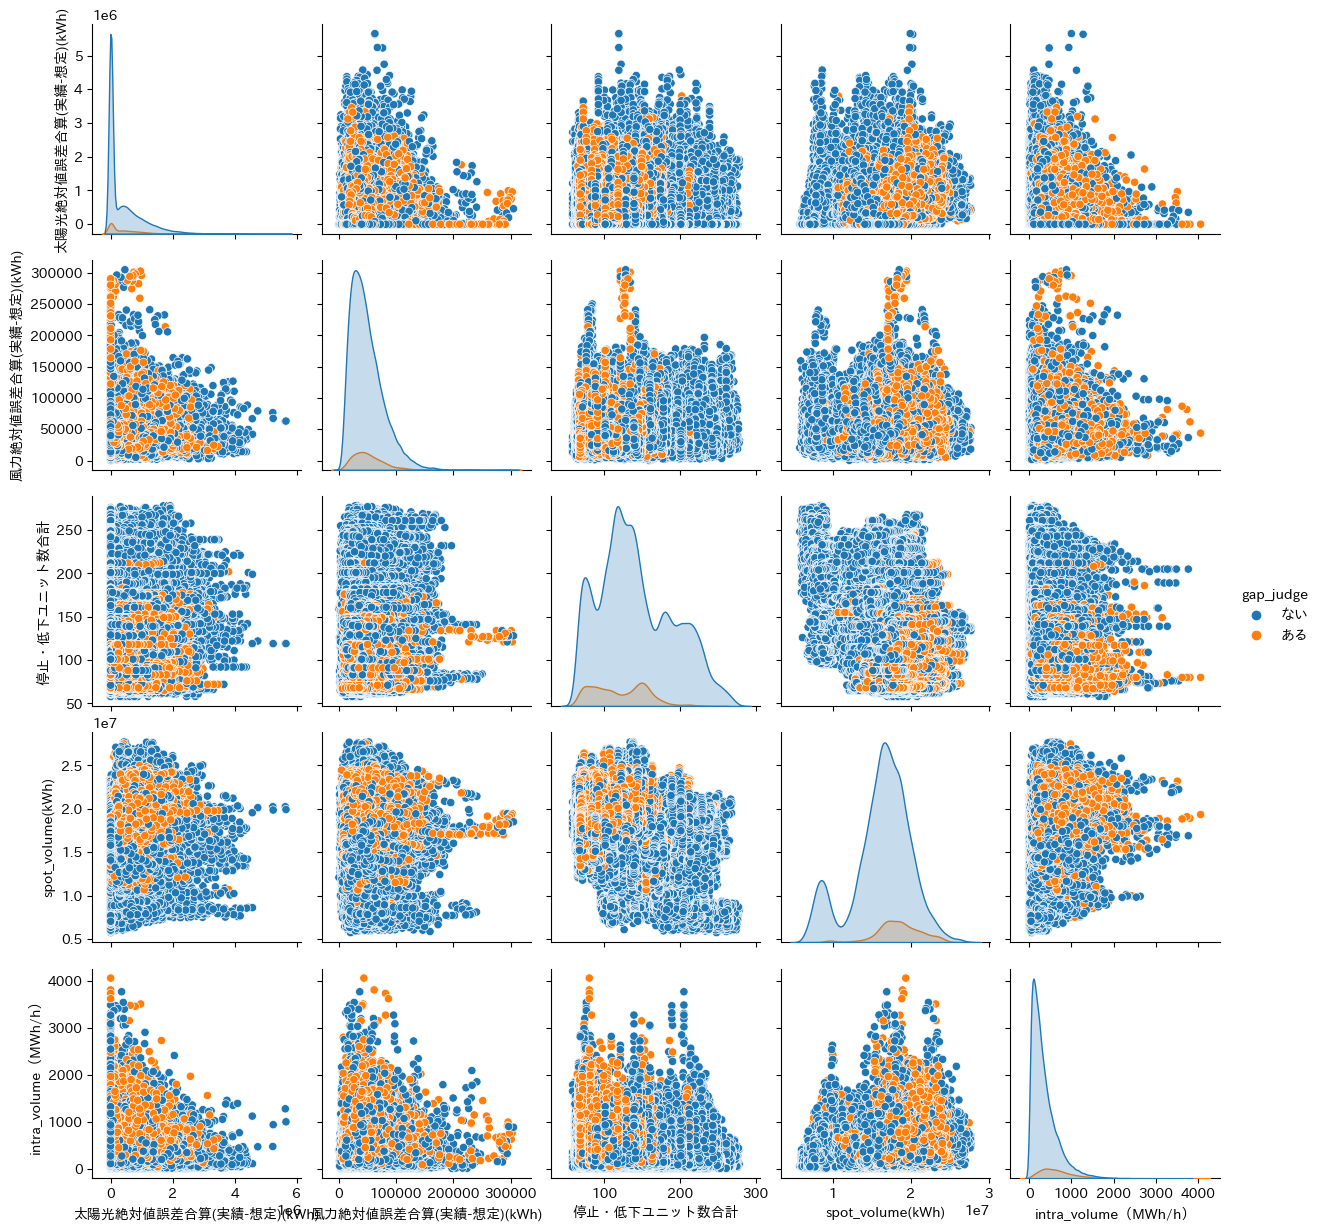

In [ ]:
# 広域予備率なし
df_select = df_king[['gap_judge','太陽光絶対値誤差合算(実績-想定)(kWh)','風力絶対値誤差合算(実績-想定)(kWh)','停止・低下ユニット数合計','spot_volume(kWh)','intra_volume（MWh/h）']].dropna()
sns.pairplot(df_select, hue='gap_judge')
plt.show()

In [ ]:

# すべて
# 広域予備率なし
df_select = df_king[['intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)(kWh)', '絶対値九電太陽光error(実績-想定)(kWh)',
       '絶対値九電風力error(実績-想定)(kWh)', '絶対値東電太陽光error(実績-想定)(kWh)',
       '絶対値東電風力error(実績-想定)(kWh)', '絶対値関電太陽光error(実績-想定)(kWh)',
       '絶対値関電風力error(実績-想定)(kWh)', '絶対値中国太陽光error(実績-想定)(kWh)',
       '絶対値中国風力error(実績-想定)(kWh)', '太陽光誤差合算(実績-想定)(kWh)(ならし)',
       '風力誤差合算(実績-想定)(kWh)(ならし)', '太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)', '広域予備率平均値(%)',
       '絶対値gap_price[intra-spot](円/kWh)','gap_judge']].dropna()
sns.pairplot(df_select, hue='gap_judge')
plt.show()

KeyboardInterrupt: 

In [44]:
from sklearn.linear_model import LogisticRegression


df_select =df_king[['gap_judge','太陽光絶対値誤差合算(実績-想定)(kWh)','風力絶対値誤差合算(実績-想定)(kWh)','停止・低下ユニット数合計','spot_volume(kWh)','intra_volume（MWh/h）']].dropna()
df = df_select.dropna()
df['gap_judge'] = df['gap_judge'].map({'ない': 0, 'ある': 1})
# 標準化
# scaler = StandardScaler()
# scaler.fit(np.array(df))
# df_std = scaler.transform(np.array(df))
# df_std = pd.DataFrame(df_std,columns=df.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
col_name = ['太陽光絶対値誤差合算(実績-想定)(kWh)','風力絶対値誤差合算(実績-想定)(kWh)','停止・低下ユニット数合計','spot_volume(kWh)','intra_volume（MWh/h）']
X = np.array(df[col_name])
Y = np.array(df['gap_judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

LogisticRegression()

In [45]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


coefficient =  [[ 1.46336120e-07  3.16818632e-07 -1.70066376e-02 -6.56111576e-08
   1.86851494e-03]]
intercept =  [-6.21321899e-05]


In [46]:
Y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

confusion matrix = 
 [[21678   132]
 [ 2006    79]]
accuracy =  0.9105252144800168
precision =  0.3744075829383886
recall =  0.03788968824940048
f1 score =  0.06881533101045295


In [52]:


df_select =df_king[['gap_judge','停止・低下ユニット数合計','spot_volume(kWh)']].dropna()
df_X= df_select[['停止・低下ユニット数合計','spot_volume(kWh)']]
df_Y=pd.DataFrame()
df_Y['gap_judge'] = df_select['gap_judge'].map({'ない': 0, 'ある': 1})

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
Y = np.array(df_Y['gap_judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

LogisticRegression()

In [53]:
df_Y

,gap_judge
0,0
1,0
2,0
3,0
4,0
...,...
84410,0
84411,0
84412,0
84413,0


In [54]:
Y_pred = lr.predict(X_test)

In [55]:

print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

confusion matrix = 
 [[22836     0]
 [ 2489     0]]
accuracy =  0.9017176702862784
precision =  0.0
recall =  0.0
f1 score =  0.0


/Users/yusuke_miyazaki/miniforge3/envs/DSenv385/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:


df_select =df_king[['gap_judge','停止・低下ユニット数合計','spot_volume(kWh)','広域予備率平均値(%)','太陽光絶対値誤差合算(実績-想定)(kWh)',
       '風力絶対値誤差合算(実績-想定)(kWh)',]].dropna()
df_X= df_select[['停止・低下ユニット数合計','spot_volume(kWh)']]
df_Y=pd.DataFrame()
df_Y['gap_judge'] = df_select['gap_judge'].map({'ない': 0, 'ある': 1})

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df_X))
df_std = scaler.transform(np.array(df_X))
df_std = pd.DataFrame(df_std,columns=df_X.columns)

# 目的変数(Y)
# Y = np.array(df['gap_judge'])

# 説明変数(X)
# col_name = ['停止・低下ユニット数合計','spot_volume(kWh)']
X = np.array(df_std)
Y = np.array(df_Y['gap_judge'])
# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)




lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)


Y_pred = lr.predict(X_test)



print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

coefficient =  [[-0.06379434  0.69957947]]
intercept =  [-0.71730241]
confusion matrix = 
 [[1654  190]
 [ 687  263]]
accuracy =  0.6861130994989263
precision =  0.5805739514348786
recall =  0.2768421052631579
f1 score =  0.37491090520313614


In [56]:
df_king.columns

Index(['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)', 'intra_volume（MWh/h）',
       'spot_volume(kWh)', '北電太陽光想定(kWh)', '北電風力想定(kWh)', '北電太陽光実績(kWh)',
       '北電風力実績(kWh)', '九電太陽光想定(kWh)', '九電太陽光実績(kWh)', '九電風力想定(kWh)',
       '九電風力実績(kWh)', '東電太陽光想定(kWh)', '東電太陽光実績(kWh)', '東電風力想定(kWh)',
       '東電風力実績(kWh)', '関電太陽光想定(kWh)', '関電太陽光実績(kWh)', '関電風力想定(kWh)',
       '関電風力実績(kWh)', '中国太陽光想定(kWh)', '中国風力想定(kWh)', '中国太陽光実績(kWh)',
       '中国風力実績(kWh)', '北海道予備率(%)', '東北予備率(%)', '東京予備率(%)', '中部予備率(%)',
       '北陸予備率(%)', '関西予備率(%)', '中国予備率(%)', '四国予備率(%)', '九州予備率(%)', '認可出力合計',
       '低下量合計', '停止・低下ユニット数合計', '北電太陽光error(実績-想定)(kWh)',
       '北電風力error(実績-想定)(kWh)', '九電太陽光error(実績-想定)(kWh)',
       '九電風力error(実績-想定)(kWh)', '東電太陽光error(実績-想定)(kWh)',
       '東電風力error(実績-想定)(kWh)', '関電太陽光error(実績-想定)(kWh)',
       '関電風力error(実績-想定)(kWh)', '中国太陽光error(実績-想定)(kWh)',
       '中国風力error(実績-想定)(kWh)', '絶対値北電太陽光error(実績-想定)(kWh)',
       '絶対値北電風力error(実績-想定)